<a href="https://colab.research.google.com/github/jahirnstu14/Digit_Recognizer_using_keras/blob/main/Digit_Recognizer_using_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

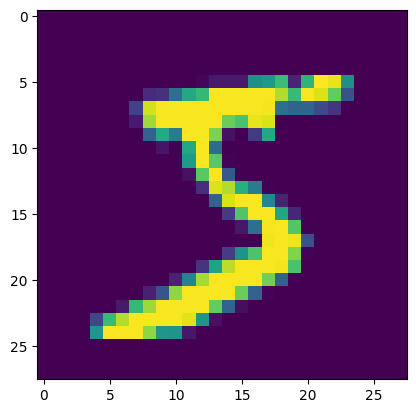

In [4]:
# to show the digit from that
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [5]:
X_train = X_train/255
X_test = X_test/255

In [6]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax')) # for output 10 number .



/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [9]:
history = model.fit(X_train,y_train,epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.8666 - loss: 0.4447 - val_accuracy: 0.9598 - val_loss: 0.1330
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9662 - loss: 0.1129 - val_accuracy: 0.9694 - val_loss: 0.1012
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9762 - loss: 0.0742 - val_accuracy: 0.9726 - val_loss: 0.0946
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9843 - loss: 0.0508 - val_accuracy: 0.9721 - val_loss: 0.0950
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9877 - loss: 0.0390 - val_accuracy: 0.9708 - val_loss: 0.1108
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9896 - loss: 0.0324 - val_accuracy: 0.9748 - val_loss: 0.0944
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9920 - loss: 0.0246 - val_accuracy: 0.9745 - val_loss: 0.1013
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9928 - loss: 0.0

In [10]:
y_prob = model.predict(X_test)
y_prob

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[6.3398580e-20, 1.3225196e-12, 7.0951312e-13, ..., 9.9999994e-01,
        1.6839671e-15, 1.7983065e-11],
       [4.2286806e-31, 1.1893172e-12, 9.9999994e-01, ..., 1.0398272e-23,
        1.1678629e-20, 5.8472188e-34],
       [1.9187467e-15, 9.9999994e-01, 1.5494798e-08, ..., 3.8826037e-08,
        5.7962484e-09, 7.9380990e-12],
       ...,
       [4.7334198e-25, 2.2799797e-20, 2.0837240e-24, ..., 1.0464439e-17,
        2.3343209e-15, 3.1649294e-10],
       [2.9480104e-23, 5.3292336e-20, 6.6322401e-34, ..., 2.6266700e-23,
        1.5886052e-07, 2.9090075e-26],
       [3.0267540e-22, 8.5054516e-18, 1.0024341e-20, ..., 3.8154800e-28,
        4.2118426e-23, 5.6169598e-25]], dtype=float32)

In [11]:
y_pred = y_prob.argmax(axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9783

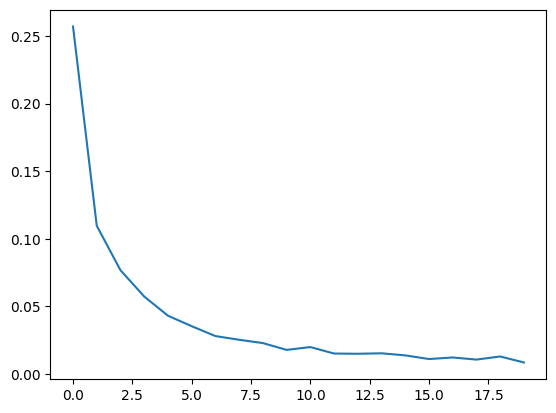

In [13]:
plt.plot(history.history['loss'])

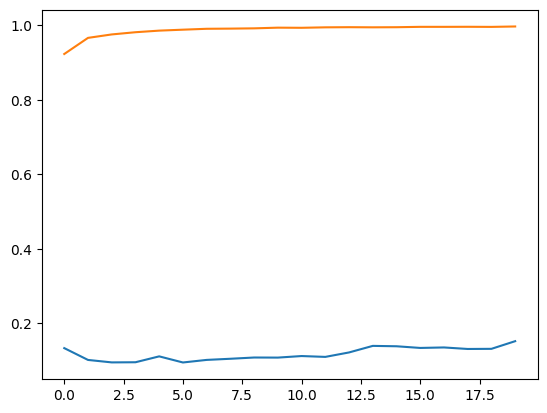

In [14]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])


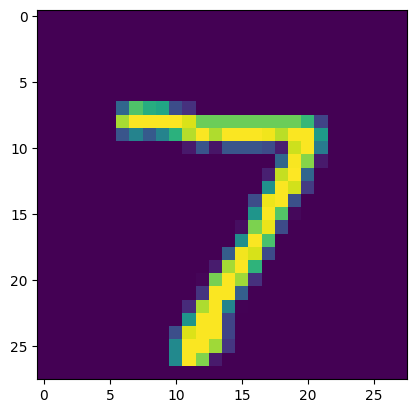

In [16]:
plt.imshow(X_test[0])

In [18]:
ten_value = model.predict(X_test[0].reshape(1,28,28))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [19]:
ten_value.argmax(axis=1)

array([7])

In [22]:
ten_value1 = model.predict(X_test[1].reshape(1,28,28))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [23]:
ten_value1.argmax(axis=1)

array([2])